In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [3]:
os.chdir(r"/Users/alessandro/Development/data-science/gabi/Diplomado_PUCP/Lecture_11")

In [4]:
det = chardet.detect(open('../_data/data_dengue_peru.csv', 'rb').read())
charenc = det['encoding']

In [5]:
main_data = pd.read_csv('../_data/data_dengue_peru.csv', encoding=charenc)

/var/folders/xk/9zl5lsdd23v_pj64s7bxjwr00000gn/T/ipykernel_25922/3240242260.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv('../_data/data_dengue_peru.csv', encoding=charenc)


In [6]:
main_data["Ubigeo_String"] = main_data["Ubigeo"].astype(str)

main_data["Ubigeo_Largo"] = main_data["Ubigeo_String"].str.len()

In [7]:
df5 = main_data[main_data["Ubigeo_Largo"] == 5]
df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)

/var/folders/xk/9zl5lsdd23v_pj64s7bxjwr00000gn/T/ipykernel_25922/3164714844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)


In [8]:
df6 = main_data[main_data["Ubigeo_Largo"] == 6]

In [9]:
new_data = pd.concat([df5, df6])

In [10]:
new_data["Ubigeo_Departamento"] = new_data["Ubigeo_String"].str[0:2]
new_data["Ubigeo_Provincia"] = new_data["Ubigeo_String"].str[0:4]

In [11]:
maps = gpd.read_file(r'../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [12]:
maps = maps[['UBIGEO', 'geometry', 'NOMBDEP']]
maps['UBIGEO'] = maps['UBIGEO'].astype(int)

In [13]:
new_data.Casos = new_data.Casos.fillna(0).replace(',', '', regex=True).astype(int)
new_data.rename(columns={"Ubigeo": "UBIGEO"}, inplace=True)

In [26]:
ds = pd.merge(maps, new_data, how="outer", on="UBIGEO")

ds.Año = ds.Año.fillna(2021).astype(int)

filtered_ds = ds[ds["Año"] == 2021]

#filtered_ds.Casos = filtered_ds.Casos.replace(0, np.nan)

<Axes: >

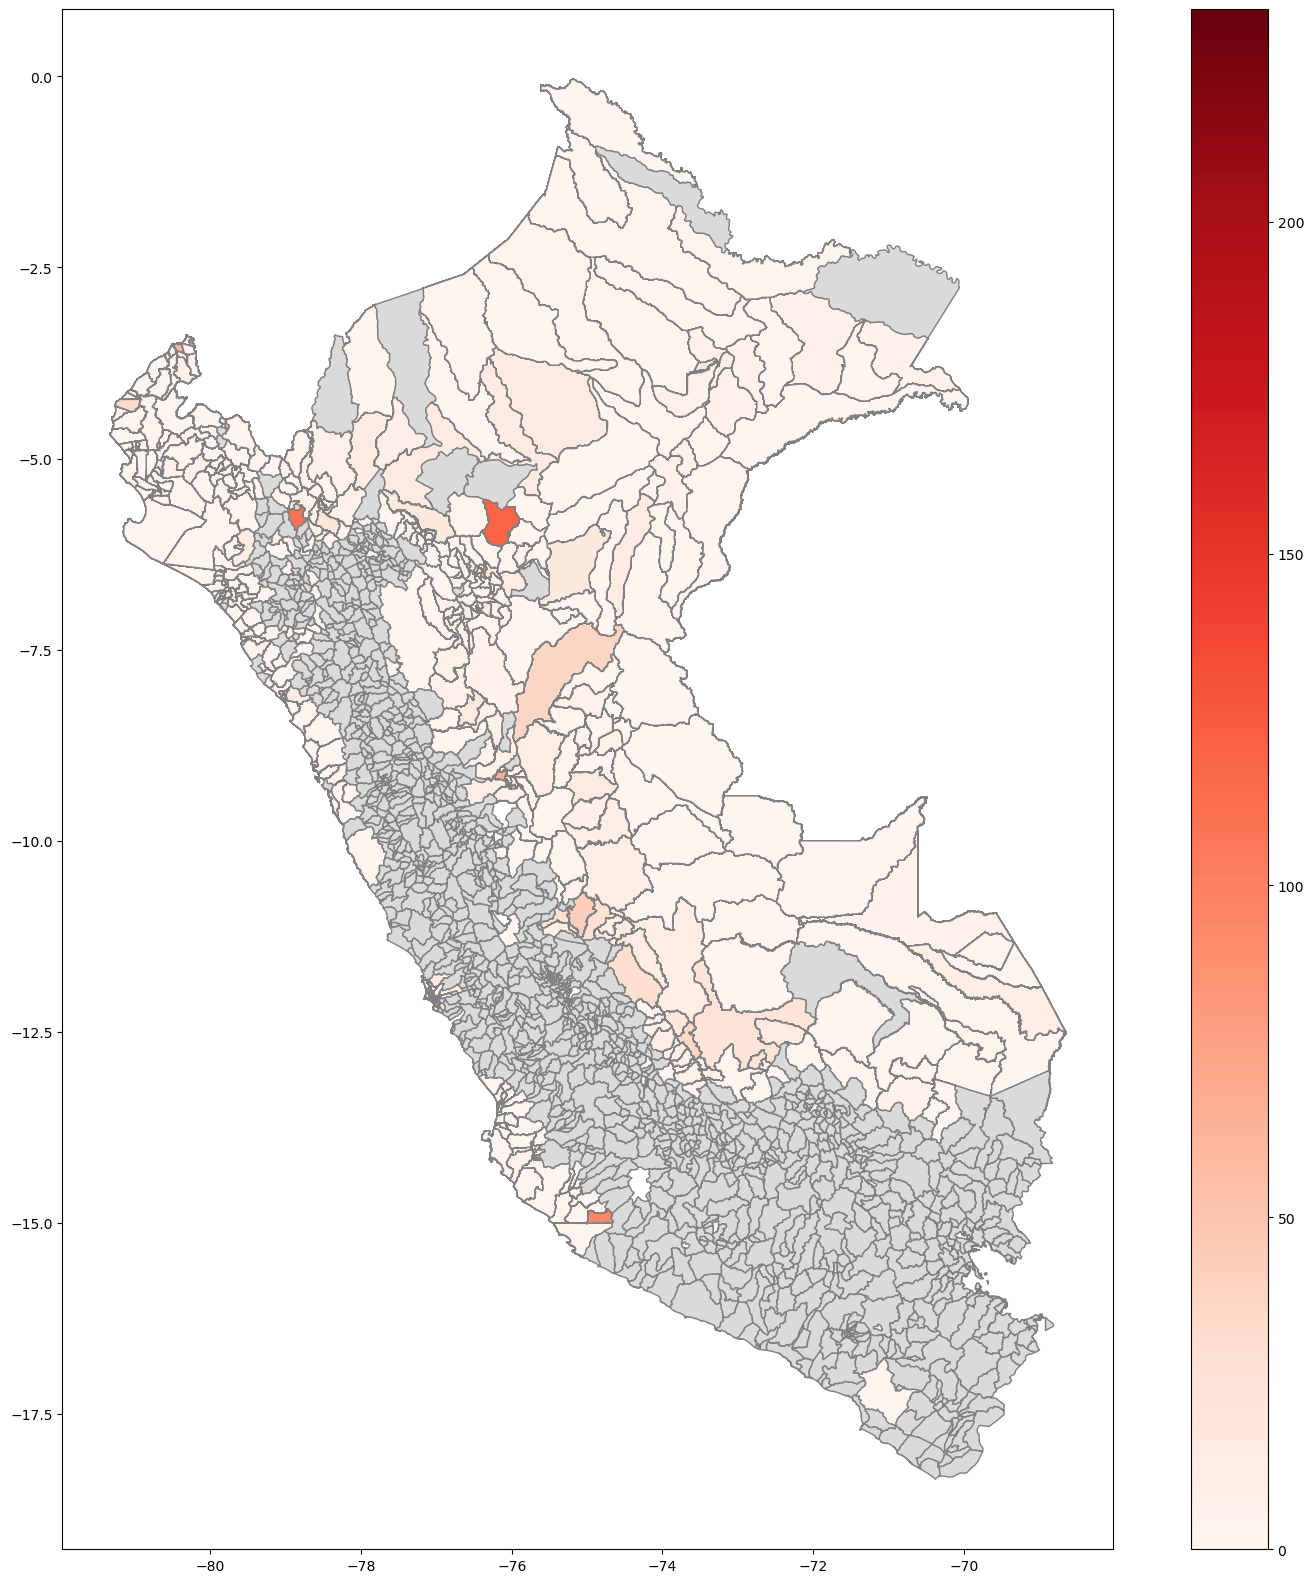

In [27]:
filtered_ds.plot(
    column='Casos',
    cmap='Reds',
    figsize=(20, 20),
    legend=True,
    linestyle='-',
    edgecolor='gray',
    missing_kwds= dict(color="#DADADB")
)